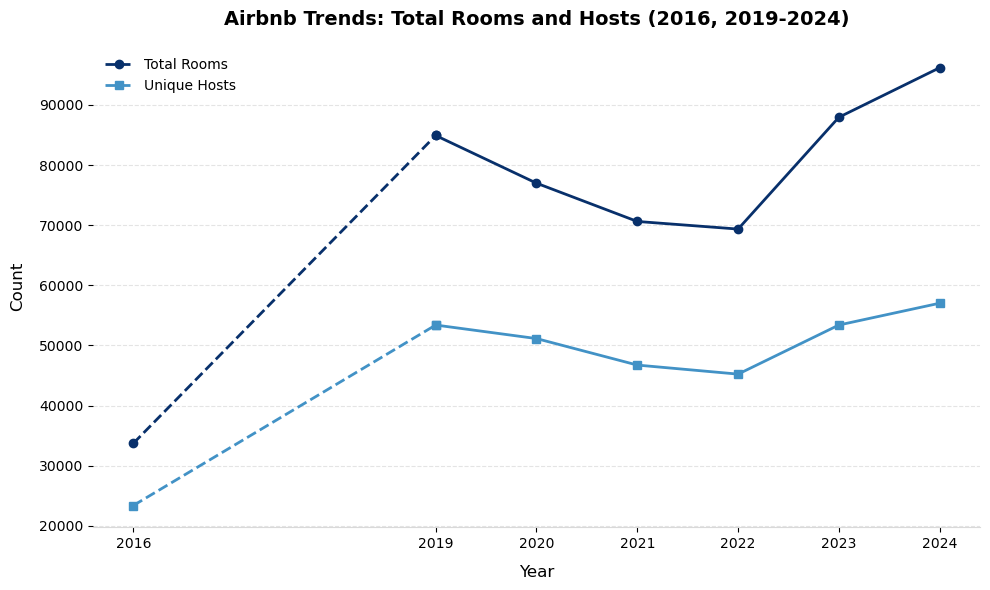

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Add year column
data_2016['year'] = 2016
data_2019['year'] = 2019
data_2020['year'] = 2020
data_2021['year'] = 2021
data_2022['year'] = 2022
data_2023['year'] = 2023
data_2024['year'] = 2024

# Combine all data
all_data = pd.concat([data_2016, data_2019, data_2020, data_2021, data_2022, data_2023, data_2024])

# Calculate the total number of listings and unique hosts for each year
room_count = all_data.groupby('year')['id'].count()
host_count = all_data.groupby('year')['host_id'].nunique()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot rooms and hosts with segmented line styles
plt.plot(room_count.index[:2], room_count.values[:2], marker='o', label='Total Rooms', 
         color='#08306B', linewidth=2, linestyle='--')  # Dashed for 2016-2019
plt.plot(room_count.index[1:], room_count.values[1:], marker='o', color='#08306B', linewidth=2)  # Solid for 2019-2024

plt.plot(host_count.index[:2], host_count.values[:2], marker='s', label='Unique Hosts', 
         color='#4292C6', linewidth=2, linestyle='--')  # Dashed for 2016-2019
plt.plot(host_count.index[1:], host_count.values[1:], marker='s', color='#4292C6', linewidth=2)  # Solid for 2019-2024

# Add title, grid, and labels
plt.title('Airbnb Trends: Total Rooms and Hosts (2016, 2019-2024)', fontsize=14, pad=15, weight='bold')
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)

# Customize the axes and gridlines
plt.grid(axis='y', color='#D9D9D9', linestyle='--', linewidth=0.8, alpha=0.7)  # Show horizontal gridlines only
plt.gca().spines['top'].set_visible(False)  # Remove the top border
plt.gca().spines['right'].set_visible(False)  # Remove the right border
plt.gca().spines['left'].set_visible(False)  # Remove the left border
plt.gca().spines['bottom'].set_color('#D9D9D9')  # Set bottom border to light gray

# Adjust tick styles
plt.xticks(room_count.index, fontsize=10)
plt.yticks(fontsize=10)

# Set legend
plt.legend(fontsize=10, loc='upper left', frameon=False)  # Single legend for simplified understanding

# Display the plot
plt.tight_layout()
plt.show()

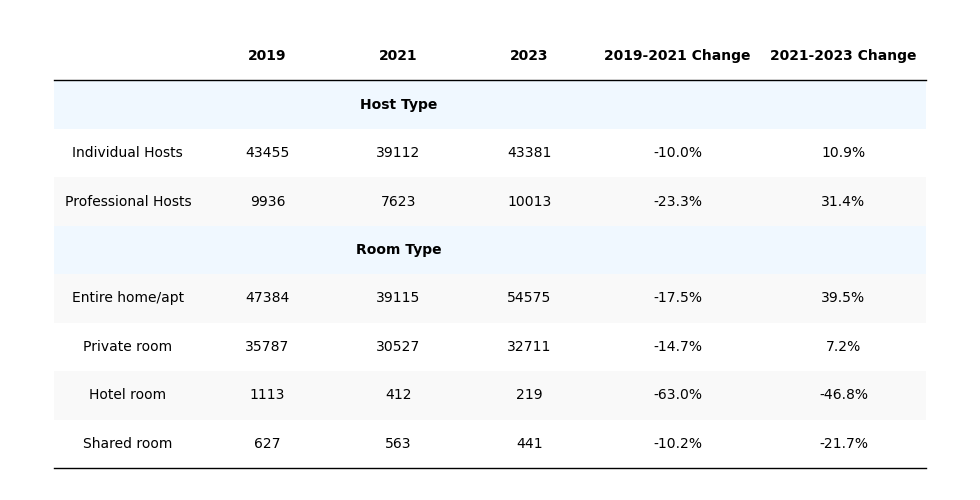

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load datasets
data_2019 = pd.read_csv("cleaned_2019_data.csv")
data_2021 = pd.read_csv("cleaned_2021_data.csv")
data_2023 = pd.read_csv("cleaned_2023_data.csv")

# Function to calculate host type counts (ensures unique host_id)
def calculate_host_type_counts(data):
    # Group by host_id to ensure unique hosts
    unique_hosts = data.groupby('host_id')['calculated_host_listings_count'].max()

    # Count Individual Hosts (1 listing)
    individual_host_count = (unique_hosts == 1).sum()

    # Count Professional Hosts (2 or more listings)
    professional_host_count = (unique_hosts >= 2).sum()

    return {'Individual Host': individual_host_count, 'Professional Host': professional_host_count}

# Function to calculate room type counts
def calculate_room_type_counts(data, room_type_column):
    return data[room_type_column].value_counts()

# Calculate host type counts for each dataset
host_type_2019 = calculate_host_type_counts(data_2019)
host_type_2021 = calculate_host_type_counts(data_2021)
host_type_2023 = calculate_host_type_counts(data_2023)

# Room type column names for different years
room_type_columns = {
    2019: "room_type",  # Room type column name for 2019
    2021: "room_type",   # Room type column name for 2021
    2023: "room_type",   # Room type column name for 2023
}

# Calculate room type counts
room_type_2019 = calculate_room_type_counts(data_2019, room_type_columns[2019])
room_type_2021 = calculate_room_type_counts(data_2021, room_type_columns[2021])
room_type_2023 = calculate_room_type_counts(data_2023, room_type_columns[2023])

# Build DataFrame for host type
host_type_df = pd.DataFrame({
    "Type": ["Individual Hosts", "Professional Hosts"],
    "2019": [host_type_2019['Individual Host'], host_type_2019['Professional Host']],
    "2021": [host_type_2021['Individual Host'], host_type_2021['Professional Host']],
    "2023": [host_type_2023['Individual Host'], host_type_2023['Professional Host']],
})

# Build DataFrame for room type
room_type_df = pd.DataFrame({
    "Type": room_type_2019.index.tolist(),
    "2019": room_type_2019.values,
    "2021": room_type_2021.reindex(room_type_2019.index, fill_value=0).values,
    "2023": room_type_2023.reindex(room_type_2019.index, fill_value=0).values,
})

# Combine host type and room type data
final_table = pd.concat([host_type_df, room_type_df], ignore_index=True)

# Calculate percentage changes
final_table["2019-2021 Change"] = ((final_table["2021"] - final_table["2019"]) / final_table["2019"] * 100).round(1).astype(str) + "%"
final_table["2021-2023 Change"] = ((final_table["2023"] - final_table["2021"]) / final_table["2021"] * 100).round(1).astype(str) + "%"

# Reorder columns
final_table = final_table[["Type", "2019", "2021", "2023", "2019-2021 Change", "2021-2023 Change"]]

# Group data
host_data = final_table.iloc[:2].values.tolist()  # Host type data
room_data = final_table.iloc[2:].values.tolist()  # Room type data

# Table data
table_data = [
    ["", "2019", "2021", "2023", "2019-2021 Change", "2021-2023 Change"],  # Column headers
    ["", "", "Host Type", "", "", ""],  # Host type row
] + host_data + [
    ["", "", "Room Type", "", "", ""],  # Room type row
] + room_data

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("off")  # Hide axes

# Number of rows and columns
n_rows = len(table_data)
n_cols = len(table_data[0])

# Adjust column widths
column_widths = [0.17, 0.15, 0.15, 0.15, 0.19, 0.19]  # Wider for the last two columns
total_width = sum(column_widths)  # Total table width (should be 1 for full width)
normalized_widths = [w / total_width for w in column_widths]  # Normalize to match figure

cell_height = 1 / n_rows  # Set row height

# Render table content
for i, row in enumerate(table_data):
    for j, cell in enumerate(row):
        # Calculate the bottom-left corner of each cell
        x = sum(normalized_widths[:j])  # Cumulative sum of column widths
        y = 1 - (i + 1) * cell_height

        # Set background color
        if i == 0:  # Column headers
            facecolor = "white"
            fontweight = "bold"
        elif i in [1, len(host_data) + 2]:  # Group rows
            facecolor = "#f0f8ff"  # Light blue background
            fontweight = "bold"
        else:
            facecolor = "white" if i % 2 == 0 else "#f9f9f9"  # Alternating row background
            fontweight = "normal"

        # Draw cell background
        ax.add_patch(Rectangle((x, y), normalized_widths[j], cell_height, facecolor=facecolor, edgecolor="none"))

        # Add text to the cell
        ax.text(
            x + normalized_widths[j] / 2,
            y + cell_height / 2,
            str(cell),
            ha="center",
            va="center",
            fontsize=10,
            fontweight=fontweight,
        )

# Add horizontal lines: below the year row and at the bottom of the table
ax.plot([0, 1], [1 - cell_height, 1 - cell_height], color="black", linewidth=1)  # Line below column headers
ax.plot([0, 1], [0, 0], color="black", linewidth=1)  # Line at the bottom of the table

# Remove extra whitespace
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the image
plt.show()
